In [ ]:
import pandas as pd
import imblearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("encode2_off.csv")
data.head()

,Unnamed: 0,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,0,76.54,0.758783,19,0,0
1,1,76.54,0.490986,13,0,1
2,2,76.54,0.428038,14,0,1
3,3,76.54,0.345700,19,0,0
4,4,76.54,0.143454,14,0,1


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,Protein Annotation,Day21-ETP,sgRNA_vs_Target,TID,MatchResult
0,76.54,0.758783,19,0,0
1,76.54,0.490986,13,0,1
2,76.54,0.428038,14,0,1
3,76.54,0.345700,19,0,0
4,76.54,0.143454,14,0,1


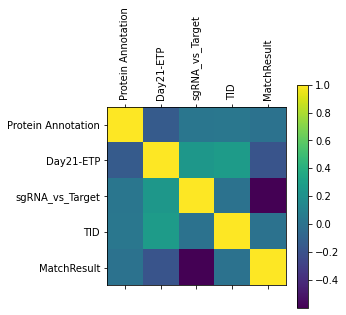

In [ ]:
plt.matshow(data.corr())
plt.xticks(np.arange(5), data.columns, rotation=90)
plt.yticks(np.arange(5), data.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
count = 0
test = pd.DataFrame()
train = pd.DataFrame()
for index, row in data.iterrows():
    count += 1
    if (count%3)==0:
        test = test.append(row)
    else:
        train = train.append(row)

In [ ]:
count = 0
test1 = pd.DataFrame()
train1 = pd.DataFrame()
for index, row in train.iterrows():
    count += 1
    if (count%3)==0:
        test1 = test1.append(row)
    else:
        train1 = train1.append(row)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27043 entries, 0 to 40563
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            27043 non-null  float64
 1   Day21-ETP           27043 non-null  float64
 2   MatchResult         27043 non-null  float64
 3   Protein Annotation  27043 non-null  float64
 4   TID                 27043 non-null  float64
dtypes: float64(5)
memory usage: 1.2 MB


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18029 entries, 0 to 40563
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            18029 non-null  float64
 1   Day21-ETP           18029 non-null  float64
 2   MatchResult         18029 non-null  float64
 3   Protein Annotation  18029 non-null  float64
 4   TID                 18029 non-null  float64
dtypes: float64(5)
memory usage: 845.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13521 entries, 2 to 40562
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            13521 non-null  float64
 1   Day21-ETP           13521 non-null  float64
 2   MatchResult         13521 non-null  float64
 3   Protein Annotation  13521 non-null  float64
 4   TID                 13521 non-null  float64
dtypes: float64(5)
memory usage: 633.8 KB


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9014 entries, 3 to 40561
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CB_vs_WT            9014 non-null   float64
 1   Day21-ETP           9014 non-null   float64
 2   MatchResult         9014 non-null   float64
 3   Protein Annotation  9014 non-null   float64
 4   TID                 9014 non-null   float64
dtypes: float64(5)
memory usage: 422.5 KB


In [ ]:
train.MatchResult.value_counts()

1.0    17186
0.0     9857
Name: MatchResult, dtype: int64

In [ ]:
train1.MatchResult.value_counts()

1.0    11515
0.0     6514
Name: MatchResult, dtype: int64

In [ ]:
test.MatchResult.value_counts()

1.0    8754
0.0    4767
Name: MatchResult, dtype: int64

In [ ]:
test1.MatchResult.value_counts()

1.0    5671
0.0    3343
Name: MatchResult, dtype: int64

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

Score:  0.37641486099358923
Weights:  [-0.06094562 -0.01253432  0.0002048   0.01832607]


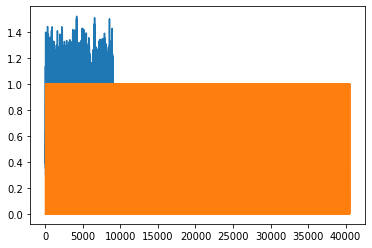

In [ ]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

In [ ]:
X_train = train1.drop(['MatchResult'], axis=1)
y_train = train1['MatchResult']
X_test = test1.drop(['MatchResult'], axis=1)
y_test = test1['MatchResult']

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

# **SVM (KERNEL: GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_gaussian))
print(classification_report(y_test,y_pred_m1_svm_gaussian))

[[3342    1]
 [ 351 5320]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.95      0.97      0.96      9014
weighted avg       0.96      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3342             |        1               |   3343   |
|  Match (1)      |      351             |        5320              |   5671  |
|        TOTAL              |      3693             |        5321             |   9014  |

In [ ]:
m1_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m1_svm_gaussian)

In [ ]:
M1_sp_SVM_gaussian=0.90
M1_se_SVM_gaussian=1.00
M1_acc_SVM_gaussian=0.96

In [ ]:
results = pd.DataFrame({'Classifier' : pd.Categorical(["SVM - Gaussian"]),
                        'Model' : pd.Categorical(["Imbalanced - Match"]),
                        'Specificity' : M1_sp_SVM_gaussian,
                        'Sensitivity' : M1_se_SVM_gaussian,
                        'Accuracy' : M1_acc_SVM_gaussian,
                        'AUC' : m1_svm_gaussian_auc})

**Model 2 - Manually Balanced**

In [ ]:
train1.MatchResult.value_counts()

1.0    11515
0.0     6514
Name: MatchResult, dtype: int64

In [ ]:
negative_cases = train1[train1['MatchResult'] == 0]
positive_cases = train1[train1['MatchResult'] == 1].sample(6514, random_state=0)
train1_balanced = pd.concat([positive_cases,negative_cases])
train1_balanced.sort_index(inplace=True)

X_train_bal = train1_balanced.drop(['MatchResult'], axis=1)
y_train_bal = train1_balanced['MatchResult']

train1_balanced.MatchResult.value_counts()

1.0    6514
0.0    6514
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_gaussian))
print(classification_report(y_test,y_pred_m2_svm_gaussian))

[[3343    0]
 [ 439 5232]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      3343
         1.0       1.00      0.92      0.96      5671

    accuracy                           0.95      9014
   macro avg       0.94      0.96      0.95      9014
weighted avg       0.96      0.95      0.95      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0               |   3343   |
|  Match (1)      |      439             |        5232              |   5671  |
|        TOTAL              |      3782             |        5232             |   9014  |

In [ ]:
m2_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m2_svm_gaussian)

In [ ]:
M2_sp_SVM_gaussian=0.88
M2_se_SVM_gaussian=1.00
M2_acc_SVM_gaussian=0.95

In [ ]:
svm_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Gaussian", 'Specificity':M2_sp_SVM_gaussian, 'Sensitivity':M2_se_SVM_gaussian, 'Accuracy':M2_acc_SVM_gaussian, 'AUC': m2_svm_gaussian_auc}
results = results.append(svm_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_gaussian))
print(classification_report(y_test,y_pred_m3_svm_gaussian))

[[3342    1]
 [ 352 5319]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.95      0.97      0.96      9014
weighted avg       0.96      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3342             |        1               |   3343   |
|  Match (1)      |      352             |        5319              |   5671  |
|        TOTAL              |      3694             |        5320             |   9014  |

In [ ]:
m3_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m3_svm_gaussian)

In [ ]:
M3_sp_SVM_gaussian=0.90
M3_se_SVM_gaussian=1.00
M3_acc_SVM_gaussian=0.96

In [ ]:
svm_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Gaussian", 'Specificity':M3_sp_SVM_gaussian, 'Sensitivity':M3_se_SVM_gaussian, 'Accuracy':M3_acc_SVM_gaussian, 'AUC': m3_svm_gaussian_auc}
results = results.append(svm_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
train1.MatchResult.value_counts()

1.0    11515
0.0     6514
Name: MatchResult, dtype: int64

In [ ]:
positive_cases = train1[train1['MatchResult'] == 1].sample(2171, random_state=0)
negative_cases = train1[train1['MatchResult'] == 0].sample(4343, random_state=0)
train1_imbalanced = pd.concat([positive_cases,negative_cases])
train1_imbalanced.sort_index(inplace=True)

X_train_imbal = train1_imbalanced.drop(['MatchResult'], axis=1)
y_train_imbal = train1_imbalanced['MatchResult']
# AFTER
train1_imbalanced.MatchResult.value_counts()

0.0    4343
1.0    2171
Name: MatchResult, dtype: int64

In [ ]:
svclassifier = SVC(kernel='rbf', gamma='auto').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_gaussian = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_gaussian))
print(classification_report(y_test,y_pred_m4_svm_gaussian))

[[3343    0]
 [ 738 4933]]
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      3343
         1.0       1.00      0.87      0.93      5671

    accuracy                           0.92      9014
   macro avg       0.91      0.93      0.92      9014
weighted avg       0.93      0.92      0.92      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0               |   3343   |
|  Match (1)      |      738             |        4933              |   5671  |
|        TOTAL              |      4081             |        4933             |   9014  |

In [ ]:
m4_svm_gaussian_auc = roc_auc_score(y_test, y_pred_m4_svm_gaussian)

In [ ]:
M4_sp_SVM_gaussian=0.82
M4_se_SVM_gaussian=1.00
M4_acc_SVM_gaussian=0.92

In [ ]:
svm_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Gaussian", 'Specificity':M4_sp_SVM_gaussian, 'Sensitivity':M4_se_SVM_gaussian, 'Accuracy':M4_acc_SVM_gaussian, 'AUC': m4_svm_gaussian_auc}
results = results.append(svm_gaussian_m4, ignore_index=True)

# **SVM (KERNEL: POLYNOMIAL)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_polynomial))
print(classification_report(y_test,y_pred_m1_svm_polynomial))

[[3210  133]
 [1225 4446]]
              precision    recall  f1-score   support

         0.0       0.72      0.96      0.83      3343
         1.0       0.97      0.78      0.87      5671

    accuracy                           0.85      9014
   macro avg       0.85      0.87      0.85      9014
weighted avg       0.88      0.85      0.85      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3210             |        133               |   3343   |
|  Match (1)      |      1225             |        4446              |   5671  |
|        TOTAL              |      4435             |        4579             |   9014  |

In [ ]:
m1_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m1_svm_polynomial)

In [ ]:
M1_sp_SVM_polynomial=0.72
M1_se_SVM_polynomial=0.96
M1_acc_SVM_polynomial=0.85

In [ ]:
svm_polynomial_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Polynomial", 'Specificity':M1_sp_SVM_polynomial, 'Sensitivity':M1_se_SVM_polynomial, 'Accuracy':M1_acc_SVM_polynomial, 'AUC': m1_svm_polynomial_auc}
results = results.append(svm_polynomial_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_polynomial))
print(classification_report(y_test,y_pred_m2_svm_polynomial))

[[3343    0]
 [1627 4044]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      3343
         1.0       1.00      0.71      0.83      5671

    accuracy                           0.82      9014
   macro avg       0.84      0.86      0.82      9014
weighted avg       0.88      0.82      0.82      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0               |   3343   |
|  Match (1)      |      1627             |        4044              |   5671  |
|        TOTAL              |      4970             |        4044             |   9014  |

In [ ]:
m2_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m2_svm_polynomial)

In [ ]:
M2_sp_SVM_polynomial=0.67
M2_se_SVM_polynomial=1.00
M2_acc_SVM_polynomial=0.82

In [ ]:
svm_polynomial_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Polynomial", 'Specificity':M2_sp_SVM_polynomial, 'Sensitivity':M2_se_SVM_polynomial, 'Accuracy':M2_acc_SVM_polynomial, 'AUC': m2_svm_polynomial_auc}
results = results.append(svm_polynomial_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_polynomial))
print(classification_report(y_test,y_pred_m3_svm_polynomial))

[[3343    0]
 [1628 4043]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80      3343
         1.0       1.00      0.71      0.83      5671

    accuracy                           0.82      9014
   macro avg       0.84      0.86      0.82      9014
weighted avg       0.88      0.82      0.82      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0               |   3343   |
|  Match (1)      |      1628             |        4043              |   5671  |
|        TOTAL              |      4971             |        4043             |   9014  |

In [ ]:
m3_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m3_svm_polynomial)

In [ ]:
M3_sp_SVM_polynomial=0.67
M3_se_SVM_polynomial=1.00
M3_acc_SVM_polynomial=0.82

In [ ]:
svm_polynomial_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Polynomial", 'Specificity':M3_sp_SVM_polynomial, 'Sensitivity':M3_se_SVM_polynomial, 'Accuracy':M3_acc_SVM_polynomial, 'AUC': m3_svm_polynomial_auc}
results = results.append(svm_polynomial_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='poly').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_polynomial = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_polynomial))
print(classification_report(y_test,y_pred_m4_svm_polynomial))

[[3343    0]
 [1856 3815]]
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3343
         1.0       1.00      0.67      0.80      5671

    accuracy                           0.79      9014
   macro avg       0.82      0.84      0.79      9014
weighted avg       0.87      0.79      0.80      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0               |   3343   |
|  Match (1)      |      1856             |        3815              |   5671  |
|        TOTAL              |      5199             |        3815             |   9014  |

In [ ]:
m4_svm_polynomial_auc = roc_auc_score(y_test, y_pred_m4_svm_polynomial)

In [ ]:
M4_sp_SVM_polynomial=0.64
M4_se_SVM_polynomial=1.00
M4_acc_SVM_polynomial=0.79

In [ ]:
svm_polynomial_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Polynomial", 'Specificity':M4_sp_SVM_polynomial, 'Sensitivity':M4_se_SVM_polynomial, 'Accuracy':M4_acc_SVM_polynomial, 'AUC': m4_svm_polynomial_auc}
results = results.append(svm_polynomial_m4, ignore_index=True)

# **SVM (KERNEL: SIGMOID)**

**Model 1 - Imbalanced towards Match**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train, y_train)

In [ ]:
y_pred_m1_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m1_svm_sigmoid))
print(classification_report(y_test,y_pred_m1_svm_sigmoid))

[[1176 2167]
 [2065 3606]]
              precision    recall  f1-score   support

         0.0       0.36      0.35      0.36      3343
         1.0       0.62      0.64      0.63      5671

    accuracy                           0.53      9014
   macro avg       0.49      0.49      0.49      9014
weighted avg       0.53      0.53      0.53      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1176             |        2167              |   3343   |
|  Match (1)      |      2065             |        3606              |   5671  |
|        TOTAL              |      3241             |        5773              |   9014  |

In [ ]:
m1_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m1_svm_sigmoid)

In [ ]:
M1_sp_SVM_sigmoid=0.36
M1_se_SVM_sigmoid=0.35
M1_acc_SVM_sigmoid=0.53

In [ ]:
svm_sigmoid_m1 = {'Model':"Imbalanced - Match", 'Classifier':"SVM - Sigmoid", 'Specificity':M1_sp_SVM_sigmoid, 'Sensitivity':M1_se_SVM_sigmoid, 'Accuracy':M1_acc_SVM_sigmoid, 'AUC': m1_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m2_svm_sigmoid))
print(classification_report(y_test,y_pred_m2_svm_sigmoid))

[[1802 1541]
 [2620 3051]]
              precision    recall  f1-score   support

         0.0       0.41      0.54      0.46      3343
         1.0       0.66      0.54      0.59      5671

    accuracy                           0.54      9014
   macro avg       0.54      0.54      0.53      9014
weighted avg       0.57      0.54      0.55      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1802             |        1541              |   3343   |
|  Match (1)      |      2620             |        3051              |   5671  |
|        TOTAL              |      4422             |        4592              |   9014  |

In [ ]:
m2_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m2_svm_sigmoid)

In [ ]:
M2_sp_SVM_sigmoid=0.41
M2_se_SVM_sigmoid=0.54
M2_acc_SVM_sigmoid=0.54

In [ ]:
svm_sigmoid_m2 = {'Model':"Balanced - Manual", 'Classifier':"SVM - Sigmoid", 'Specificity':M2_sp_SVM_sigmoid, 'Sensitivity':M2_se_SVM_sigmoid, 'Accuracy':M2_acc_SVM_sigmoid, 'AUC': m2_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m3_svm_sigmoid))
print(classification_report(y_test,y_pred_m3_svm_sigmoid))

[[1799 1544]
 [2618 3053]]
              precision    recall  f1-score   support

         0.0       0.41      0.54      0.46      3343
         1.0       0.66      0.54      0.59      5671

    accuracy                           0.54      9014
   macro avg       0.54      0.54      0.53      9014
weighted avg       0.57      0.54      0.55      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1799             |        1544              |   3343   |
|  Match (1)      |      2618             |        3053              |   5671  |
|        TOTAL              |      4417             |        4597              |   9014  |

In [ ]:
m3_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m3_svm_sigmoid)

In [ ]:
M3_sp_SVM_sigmoid=0.41
M3_se_SVM_sigmoid=0.54
M3_acc_SVM_sigmoid=0.54

In [ ]:
svm_sigmoid_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"SVM - Sigmoid", 'Specificity':M3_sp_SVM_sigmoid, 'Sensitivity':M3_se_SVM_sigmoid, 'Accuracy':M3_acc_SVM_sigmoid, 'AUC': m3_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
svclassifier = SVC(kernel='sigmoid').fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_svm_sigmoid = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred_m4_svm_sigmoid))
print(classification_report(y_test,y_pred_m4_svm_sigmoid))

[[2217 1126]
 [3710 1961]]
              precision    recall  f1-score   support

         0.0       0.37      0.66      0.48      3343
         1.0       0.64      0.35      0.45      5671

    accuracy                           0.46      9014
   macro avg       0.50      0.50      0.46      9014
weighted avg       0.54      0.46      0.46      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      2217             |        1126              |   3343   |
|  Match (1)      |      3710             |        1961              |   5671  |
|        TOTAL              |      5927             |        3087              |   9014  |

In [ ]:
m4_svm_sigmoid_auc = roc_auc_score(y_test, y_pred_m4_svm_sigmoid)

In [ ]:
M4_sp_SVM_sigmoid=0.37
M4_se_SVM_sigmoid=0.66
M4_acc_SVM_sigmoid=0.46

In [ ]:
svm_sigmoid_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"SVM - Sigmoid", 'Specificity':M4_sp_SVM_sigmoid, 'Sensitivity':M4_se_SVM_sigmoid, 'Accuracy':M4_acc_SVM_sigmoid, 'AUC': m4_svm_sigmoid_auc}
results = results.append(svm_sigmoid_m4, ignore_index=True)

# **NAIVE BAYES (GAUSSIAN)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_gaussian))
print(classification_report(y_test,y_pred_m1_naive_gaussian))

[[3343    0]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0              |   3343   |
|  Match (1)      |      324             |        5347              |   5671  |
|        TOTAL              |      3667             |        5347              |   9014  |

In [ ]:
m1_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m1_naive_gaussian)

In [ ]:
M1_sp_naive_gaussian=0.91
M1_se_naive_gaussian=1.00
M1_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M1_sp_naive_gaussian, 'Sensitivity':M1_se_naive_gaussian, 'Accuracy':M1_acc_naive_gaussian, 'AUC': m1_naive_gaussian_auc}
results = results.append(naive_gaussian_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_gaussian))
print(classification_report(y_test,y_pred_m2_naive_gaussian))

[[3343    0]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0              |   3343   |
|  Match (1)      |      324             |        5347              |   5671  |
|        TOTAL              |      3667             |        5347              |   9014  |

In [ ]:
m2_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m2_naive_gaussian)

In [ ]:
M2_sp_naive_gaussian=0.91
M2_se_naive_gaussian=1.00
M2_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M2_sp_naive_gaussian, 'Sensitivity':M2_se_naive_gaussian, 'Accuracy':M2_acc_naive_gaussian, 'AUC': m2_naive_gaussian_auc}
results = results.append(naive_gaussian_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = GaussianNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_gaussian))
print(classification_report(y_test,y_pred_m3_naive_gaussian))

[[3343    0]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0              |   3343   |
|  Match (1)      |      324             |        5347              |   5671  |
|        TOTAL              |      3667             |        5347              |   9014  |

In [ ]:
m3_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m3_naive_gaussian)

In [ ]:
M3_sp_naive_gaussian=0.91
M3_se_naive_gaussian=1.00
M3_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M3_sp_naive_gaussian, 'Sensitivity':M3_se_naive_gaussian, 'Accuracy':M3_acc_naive_gaussian, 'AUC': m3_naive_gaussian_auc}
results = results.append(naive_gaussian_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = GaussianNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_gaussian = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_gaussian))
print(classification_report(y_test,y_pred_m4_naive_gaussian))

[[3343    0]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0              |   3343   |
|  Match (1)      |      324             |        5347              |   5671  |
|        TOTAL              |      3667             |        5347              |   9014  |

In [ ]:
m4_naive_gaussian_auc = roc_auc_score(y_test, y_pred_m4_naive_gaussian)

In [ ]:
M4_sp_naive_gaussian=0.91
M4_se_naive_gaussian=1.00
M4_acc_naive_gaussian=0.96

In [ ]:
naive_gaussian_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Gaussian", 'Specificity':M4_sp_naive_gaussian, 'Sensitivity':M4_se_naive_gaussian, 'Accuracy':M4_acc_naive_gaussian, 'AUC': m4_naive_gaussian_auc}
results = results.append(naive_gaussian_m4, ignore_index=True)

# **Naive Bayes (Bernoulli)**

**Model 1 - Imbalanced towards Match**

In [ ]:
gnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
y_pred_m1_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_naive_bernoulli))
print(classification_report(y_test,y_pred_m1_naive_bernoulli))

[[1127 2216]
 [1030 4641]]
              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41      3343
         1.0       0.68      0.82      0.74      5671

    accuracy                           0.64      9014
   macro avg       0.60      0.58      0.58      9014
weighted avg       0.62      0.64      0.62      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1127             |       2216              |   3343   |
|  Match (1)      |      1030             |        4641             |   5671  |
|        TOTAL              |      2157             |        6857              |   9014  |

In [ ]:
m1_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m1_naive_bernoulli)

In [ ]:
M1_sp_naive_bernoulli=0.52
M1_se_naive_bernoulli=0.34
M1_acc_naive_bernoulli=0.64

In [ ]:
naive_bernoullii_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M1_sp_naive_bernoulli, 'Sensitivity':M1_se_naive_bernoulli, 'Accuracy':M1_acc_naive_bernoulli, 'AUC':m1_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_naive_bernoulli))
print(classification_report(y_test,y_pred_m2_naive_bernoulli))

[[1127 2216]
 [1030 4641]]
              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41      3343
         1.0       0.68      0.82      0.74      5671

    accuracy                           0.64      9014
   macro avg       0.60      0.58      0.58      9014
weighted avg       0.62      0.64      0.62      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1127             |       2216              |   3343   |
|  Match (1)      |      1030             |        4641             |   5671  |
|        TOTAL              |      2157             |        6857              |   9014  |

In [ ]:
m2_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m2_naive_bernoulli)

In [ ]:
M2_sp_naive_bernoulli=0.52
M2_se_naive_bernoulli=0.34
M2_acc_naive_bernoulli=0.64

In [ ]:
naive_bernoullii_m2 = {'Model':"Balanced - Manual", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M2_sp_naive_bernoulli, 'Sensitivity':M2_se_naive_bernoulli, 'Accuracy':M2_acc_naive_bernoulli, 'AUC':m2_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
gnb = BernoulliNB().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_naive_bernoulli))
print(classification_report(y_test,y_pred_m3_naive_bernoulli))

[[1127 2216]
 [1030 4641]]
              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41      3343
         1.0       0.68      0.82      0.74      5671

    accuracy                           0.64      9014
   macro avg       0.60      0.58      0.58      9014
weighted avg       0.62      0.64      0.62      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      1127             |       2216              |   3343   |
|  Match (1)      |      1030             |        4641             |   5671  |
|        TOTAL              |      2157             |        6857              |   9014  |

In [ ]:
m3_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m3_naive_bernoulli)

In [ ]:
M3_sp_naive_bernoulli=0.52
M3_se_naive_bernoulli=0.34
M3_acc_naive_bernoulli=0.64

In [ ]:
naive_bernoullii_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M3_sp_naive_bernoulli, 'Sensitivity':M3_se_naive_bernoulli, 'Accuracy':M3_acc_naive_bernoulli, 'AUC':m3_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
gnb = BernoulliNB().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_naive_bernoulli = gnb.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_naive_bernoulli))
print(classification_report(y_test,y_pred_m4_naive_bernoulli))

[[3343    0]
 [5671    0]]
              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54      3343
         1.0       0.00      0.00      0.00      5671

    accuracy                           0.37      9014
   macro avg       0.19      0.50      0.27      9014
weighted avg       0.14      0.37      0.20      9014



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3343             |        0              |   3343   |
|  Match (1)      |      5671             |        0             |   5171  |
|        TOTAL              |      9014             |        0              |   9014  |

In [ ]:
m4_naive_bernoulli_auc = roc_auc_score(y_test, y_pred_m4_naive_bernoulli)

In [ ]:
M4_sp_naive_bernoulli=0.37
M4_se_naive_bernoulli=1.00
M4_acc_naive_bernoulli=0.37

In [ ]:
naive_bernoullii_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Naive Bayes - Bernoulli", 'Specificity':M4_sp_naive_bernoulli, 'Sensitivity':M4_se_naive_bernoulli, 'Accuracy':M4_acc_naive_bernoulli, 'AUC':m4_naive_bernoulli_auc}
results = results.append(naive_bernoullii_m4, ignore_index=True)

# **Random Forest**



**Model 1 - Imbalanced towards Match**

In [ ]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m1_rf))
print(classification_report(y_test,y_pred_m1_rf))

[[3138  205]
 [ 251 5420]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      3343
         1.0       0.96      0.96      0.96      5671

    accuracy                           0.95      9014
   macro avg       0.94      0.95      0.95      9014
weighted avg       0.95      0.95      0.95      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3138             |        205              |   3343   |
|  Match (1)      |      251             |        5420             |   5671  |
|        TOTAL              |      3389             |        5625              |   9014  |

In [ ]:
m1_rf_auc = roc_auc_score(y_test, y_pred_m1_rf)

In [ ]:
M1_sp_rf=0.93
M1_se_rf=0.94
M1_acc_rf=0.95

In [ ]:
rf_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Random Forest", 'Specificity':M1_sp_rf, 'Sensitivity':M1_se_rf, 'Accuracy':M1_acc_rf, 'AUC':m1_rf_auc}
results = results.append(rf_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m2_rf))
print(classification_report(y_test,y_pred_m2_rf))

[[3232  111]
 [ 272 5399]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      3343
         1.0       0.98      0.95      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.95      0.96      0.95      9014
weighted avg       0.96      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3232             |        111              |   3343   |
|  Match (1)      |      272             |        5399             |   5671  |
|        TOTAL              |      3504             |        5510              |   9014  |

In [ ]:
m2_rf_auc = roc_auc_score(y_test, y_pred_m2_rf)

In [ ]:
M2_sp_rf=0.92
M2_se_rf=0.97
M2_acc_rf=0.96

In [ ]:
rf_m2 = {'Model':"Balanced - Manual", 'Classifier':"Random Forest", 'Specificity':M2_sp_rf, 'Sensitivity':M2_se_rf, 'Accuracy':M2_acc_rf, 'AUC':m2_rf_auc}
results = results.append(rf_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
rf = RandomForestClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m3_rf))
print(classification_report(y_test,y_pred_m3_rf))

[[3155  188]
 [ 251 5420]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      3343
         1.0       0.97      0.96      0.96      5671

    accuracy                           0.95      9014
   macro avg       0.95      0.95      0.95      9014
weighted avg       0.95      0.95      0.95      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3155             |        188              |   3343   |
|  Match (1)      |      251             |        5420             |   5671  |
|        TOTAL              |      3406             |        5608              |   9014  |

In [ ]:
m3_rf_auc = roc_auc_score(y_test, y_pred_m3_rf)

In [ ]:
M3_sp_rf=0.93
M3_se_rf=0.94
M3_acc_rf=0.95

In [ ]:
rf_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Random Forest", 'Specificity':M3_sp_rf, 'Sensitivity':M3_se_rf, 'Accuracy':M3_acc_rf, 'AUC':m3_rf_auc}
results = results.append(rf_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
rf = RandomForestClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_m4_rf))
print(classification_report(y_test,y_pred_m4_rf))

[[3308   35]
 [ 296 5375]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      3343
         1.0       0.99      0.95      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3308             |        35              |   3343   |
|  Match (1)      |      296             |        5375             |   5671  |
|        TOTAL              |      3604             |        5410              |   9014  |

In [ ]:
m4_rf_auc = roc_auc_score(y_test, y_pred_m4_rf)

In [ ]:
M4_sp_rf=0.92
M4_se_rf=0.99
M4_acc_rf=0.96

In [ ]:
rf_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Random Forest", 'Specificity':M4_sp_rf, 'Sensitivity':M4_se_rf, 'Accuracy':M4_acc_rf, 'AUC':m4_rf_auc}
results = results.append(rf_m4, ignore_index=True)

# **LightGBM**

**Model 1 - Imbalanced towards Match**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_m1_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m1_lgb))
print(classification_report(y_test,y_pred_m1_lgb))

[[3336    7]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3336             |        7              |   3343   |
|  Match (1)      |      324             |        5347             |   5671  |
|        TOTAL              |      3660             |        5354              |   9014  |

In [ ]:
m1_lgb_auc = roc_auc_score(y_test, y_pred_m1_lgb)

In [ ]:
M1_sp_lgb=0.91
M1_se_lgb=1.00
M1_acc_lgb=0.96

In [ ]:
lgb_m1 = {'Model':"Imbalanced - Match", 'Classifier':"Light GBM", 'Specificity':M1_sp_lgb, 'Sensitivity':M1_se_lgb, 'Accuracy':M1_acc_lgb, 'AUC':m1_lgb_auc}
results = results.append(lgb_m1, ignore_index=True)

**Model 2 - Manually Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_bal, y_train_bal)

In [ ]:
y_pred_m2_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m2_lgb))
print(classification_report(y_test,y_pred_m2_lgb))

[[3339    4]
 [ 322 5349]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3339             |        4              |   3343   |
|  Match (1)      |      322             |        5349             |   5671  |
|        TOTAL              |      3661             |        5353              |   9014  |

In [ ]:
m2_lgb_auc = roc_auc_score(y_test, y_pred_m2_lgb)

In [ ]:
M2_sp_lgb=0.91
M2_se_lgb=1.00
M2_acc_lgb=0.96

In [ ]:
lgb_m2 = {'Model':"Balanced - Manual", 'Classifier':"Light GBM", 'Specificity':M2_sp_lgb, 'Sensitivity':M2_se_lgb, 'Accuracy':M2_acc_lgb, 'AUC':m2_lgb_auc}
results = results.append(lgb_m2, ignore_index=True)

**Model 3 - SMOTE Balanced**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred_m3_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m3_lgb))
print(classification_report(y_test,y_pred_m3_lgb))

[[3343    0]
 [ 324 5347]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3336             |        0              |   3343   |
|  Match (1)      |      324             |        5347             |   5671  |
|        TOTAL              |      3660             |        5354              |   9014  |

In [ ]:
m3_lgb_auc = roc_auc_score(y_test, y_pred_m3_lgb)

In [ ]:
M3_sp_lgb=0.91
M3_se_lgb=1.00
M3_acc_lgb=0.96

In [ ]:
lgb_m3 = {'Model':"Balanced - SMOTE", 'Classifier':"Light GBM", 'Specificity':M3_sp_lgb, 'Sensitivity':M3_se_lgb, 'Accuracy':M3_acc_lgb, 'AUC':m3_lgb_auc}
results = results.append(lgb_m3, ignore_index=True)

**Model 4 - Imbalanced towards Mismatch**

In [ ]:
model = lgb.LGBMClassifier().fit(X_train_imbal, y_train_imbal)

In [ ]:
y_pred_m4_lgb = model.predict(X_test) 
print(confusion_matrix(y_test,y_pred_m4_lgb))
print(classification_report(y_test,y_pred_m4_lgb))

[[3339    4]
 [ 322 5349]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      3343
         1.0       1.00      0.94      0.97      5671

    accuracy                           0.96      9014
   macro avg       0.96      0.97      0.96      9014
weighted avg       0.97      0.96      0.96      9014



| ACTUAL\PREDICTED          | Mismatch (0) | Match (1) | TOTAL |
|---------------------------|---------------------|-------------------------|-------|
|    Mismatch (0)|      3339             |        4              |   3343   |
|  Match (1)      |      322             |        5349             |   5671  |
|        TOTAL              |      3661             |        5353              |   9014  |

In [ ]:
m4_lgb_auc = roc_auc_score(y_test, y_pred_m4_lgb)

In [ ]:
M4_sp_lgb=0.91
M4_se_lgb=1.00
M4_acc_lgb=0.96

In [ ]:
lgb_m4 = {'Model':"Imbalanced - Mismatch", 'Classifier':"Light GBM", 'Specificity':M4_sp_lgb, 'Sensitivity':M4_se_lgb, 'Accuracy':M4_acc_lgb, 'AUC': m4_lgb_auc}
results = results.append(lgb_m4, ignore_index=True)

In [ ]:
#results.drop(results.tail(4).index,inplace=True)
results

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
0,SVM - Gaussian,Imbalanced - Match,0.90,1.00,0.96,0.968904
1,SVM - Gaussian,Balanced - Manual,0.88,1.00,0.95,0.961294
2,SVM - Gaussian,Balanced - SMOTE,0.90,1.00,0.96,0.968815
3,SVM - Gaussian,Imbalanced - Mismatch,0.82,1.00,0.92,0.934932
4,SVM - Polynomial,Imbalanced - Match,0.72,0.96,0.85,0.872102
5,SVM - Polynomial,Balanced - Manual,0.67,1.00,0.82,0.856551
6,SVM - Polynomial,Balanced - SMOTE,0.67,1.00,0.82,0.856463
7,SVM - Polynomial,Imbalanced - Mismatch,0.64,1.00,0.79,0.836360
8,SVM - Sigmoid,Imbalanced - Match,0.36,0.35,0.53,0.493823
9,SVM - Sigmoid,Balanced - Manual,0.41,0.54,0.54,0.538519


In [ ]:
results.sort_values('AUC').tail(8)

,Classifier,Model,Specificity,Sensitivity,Accuracy,AUC
24,Light GBM,Imbalanced - Match,0.91,1.0,0.96,0.970387
25,Light GBM,Balanced - Manual,0.91,1.0,0.96,0.971012
27,Light GBM,Imbalanced - Mismatch,0.91,1.0,0.96,0.971012
14,Naive Bayes - Gaussian,Balanced - SMOTE,0.91,1.0,0.96,0.971434
26,Light GBM,Balanced - SMOTE,0.91,1.0,0.96,0.971434
12,Naive Bayes - Gaussian,Imbalanced - Match,0.91,1.0,0.96,0.971434
15,Naive Bayes - Gaussian,Imbalanced - Mismatch,0.91,1.0,0.96,0.971434
13,Naive Bayes - Gaussian,Balanced - Manual,0.91,1.0,0.96,0.971434


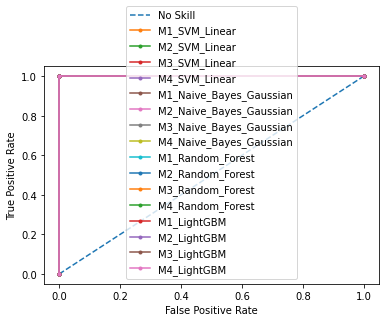

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
m1_svm_linear_fpr, m1_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m1_svm_linear)
m2_svm_linear_fpr, m2_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m2_svm_linear)
m3_svm_linear_fpr, m3_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m3_svm_linear)
m4_svm_linear_fpr, m4_svm_linear_tpr, _ = roc_curve(y_test, y_pred_m4_svm_linear)
m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m1_naive_gaussian)
m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m2_naive_gaussian)
m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m3_naive_gaussian)
m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, _ = roc_curve(y_test, y_pred_m4_naive_gaussian)
m1_rf_fpr, m1_rf_tpr, _ = roc_curve(y_test, y_pred_m1_rf)
m2_rf_fpr, m2_rf_tpr, _ = roc_curve(y_test, y_pred_m2_rf)
m3_rf_fpr, m3_rf_tpr, _ = roc_curve(y_test, y_pred_m3_rf)
m4_rf_fpr, m4_rf_tpr, _ = roc_curve(y_test, y_pred_m4_rf)
m1_lgb_fpr, m1_lgb_tpr, _ = roc_curve(y_test, y_pred_m1_lgb)
m2_lgb_fpr, m2_lgb_tpr, _ = roc_curve(y_test, y_pred_m2_lgb)
m3_lgb_fpr, m3_lgb_tpr, _ = roc_curve(y_test, y_pred_m3_lgb)
m4_lgb_fpr, m4_lgb_tpr, _ = roc_curve(y_test, y_pred_m4_lgb)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m1_svm_linear_fpr, m1_svm_linear_tpr, marker='.', label='M1_SVM_Linear')
pyplot.plot(m2_svm_linear_fpr, m2_svm_linear_tpr, marker='.', label='M2_SVM_Linear')
pyplot.plot(m3_svm_linear_fpr, m3_svm_linear_tpr, marker='.', label='M3_SVM_Linear')
pyplot.plot(m4_svm_linear_fpr, m4_svm_linear_tpr, marker='.', label='M4_SVM_Linear')
pyplot.plot(m1_naive_gaussian_fpr, m1_naive_gaussian_tpr, marker='.', label='M1_Naive_Bayes_Gaussian')
pyplot.plot(m2_naive_gaussian_fpr, m2_naive_gaussian_tpr, marker='.', label='M2_Naive_Bayes_Gaussian')
pyplot.plot(m3_naive_gaussian_fpr, m3_naive_gaussian_tpr, marker='.', label='M3_Naive_Bayes_Gaussian')
pyplot.plot(m4_naive_gaussian_fpr, m4_naive_gaussian_tpr, marker='.', label='M4_Naive_Bayes_Gaussian')
pyplot.plot(m1_rf_fpr, m1_rf_tpr, marker='.', label='M1_Random_Forest')
pyplot.plot(m2_rf_fpr, m2_rf_tpr, marker='.', label='M2_Random_Forest')
pyplot.plot(m3_rf_fpr, m3_rf_tpr, marker='.', label='M3_Random_Forest')
pyplot.plot(m4_rf_fpr, m4_rf_tpr, marker='.', label='M4_Random_Forest')
pyplot.plot(m1_lgb_fpr, m1_lgb_tpr, marker='.', label='M1_LightGBM')
pyplot.plot(m2_lgb_fpr, m2_lgb_tpr, marker='.', label='M2_LightGBM')
pyplot.plot(m3_lgb_fpr, m3_lgb_tpr, marker='.', label='M3_LightGBM')
pyplot.plot(m4_lgb_fpr, m4_lgb_tpr, marker='.', label='M4_LightGBM')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()